In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix , classification_report ,accuracy_score

In [118]:
pd.read_csv("Titanic-Dataset.csv") 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df = pd.read_csv("Titanic-Dataset.csv") 

In [117]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S  


In [13]:

print('\nDescribe (numerical):')
display(df.describe())



Describe (numerical):


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:

# missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing_pct = (df.isnull().mean() * 100).sort_values(ascending=False)
missing_tbl = pd.concat([missing, missing_pct], axis=1, keys=['missing', 'percent'])
print('\nMissing values (top 20):')
display(missing_tbl.head(20))

# duplicates
print('\nDuplicate rows:', df.duplicated().sum())

if "Age" in df.columns:
    df["Age"] = df["Age"].fillna(df["Age"].median())

# Fill Embarked with mode
if "Embarked" in df.columns:
    df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# Drop Cabin safely (ignore if missing)
df = df.drop(columns=["Cabin"], errors="ignore")



Missing values (top 20):


,missing,percent
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,0.0



Duplicate rows: 0


In [27]:

# target distribution (try common target names)
target_col = 'Survived' if 'Survived' in df.columns else df.columns[1]
print(f"\nUsing target column: {target_col}")
print(df[target_col].value_counts(dropna=False))
print('\nSurvival rate:', df[target_col].mean() if pd.api.types.is_numeric_dtype(df[target_col]) else df[target_col].value_counts(normalize=True))



Using target column: Survived
Survived
0    549
1    342
Name: count, dtype: int64

Survival rate: 0.3838383838383838


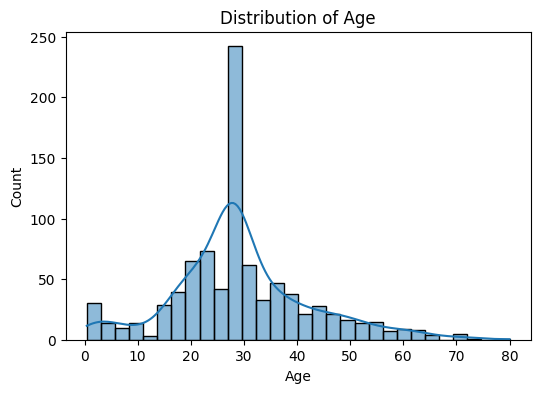

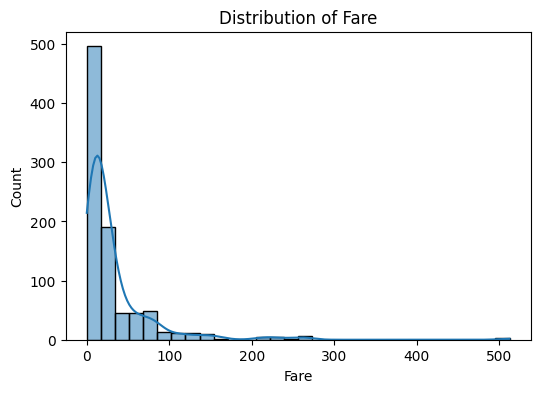

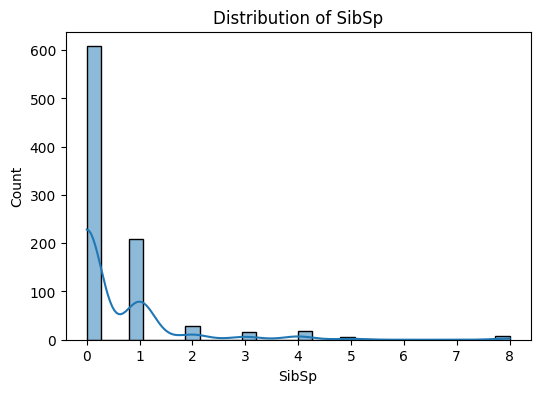

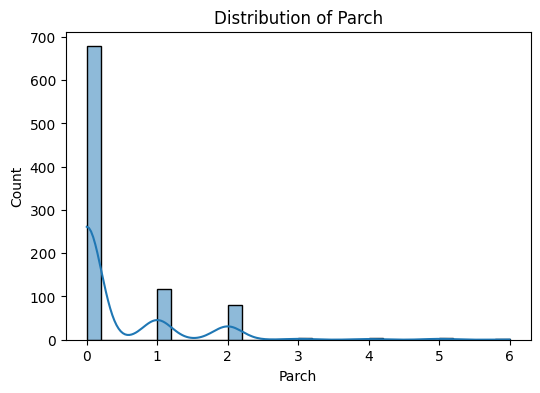

In [32]:

# Univariate Analysis

num_cols = [c for c in ["Age", "Fare", "SibSp", "Parch"] if c in df.columns]
cat_cols = [c for c in ["Survived", "Pclass", "Sex", "Embarked"] if c in df.columns]

# Numerical distributions
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()




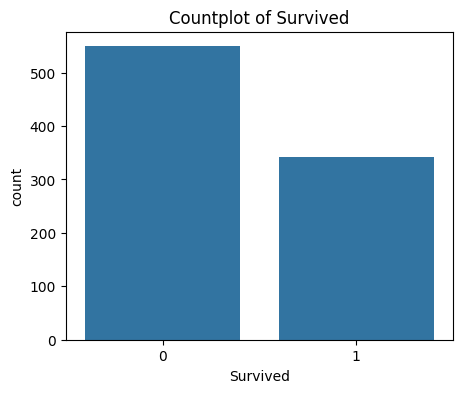

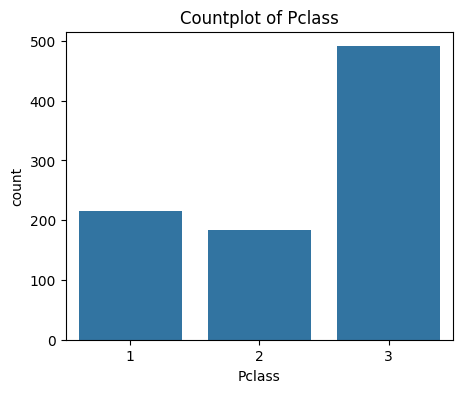

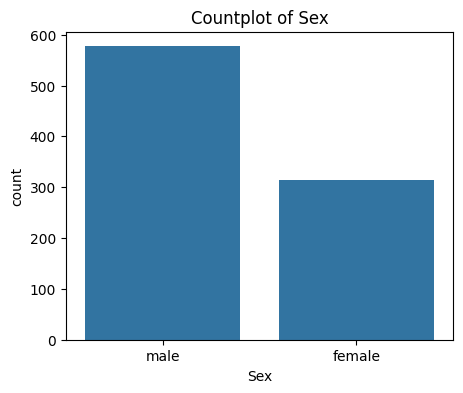

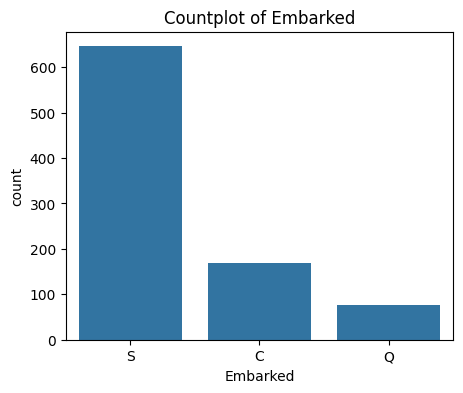

In [31]:
# Categorical counts
for col in cat_cols:
    plt.figure(figsize=(5,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Countplot of {col}")
    plt.show()

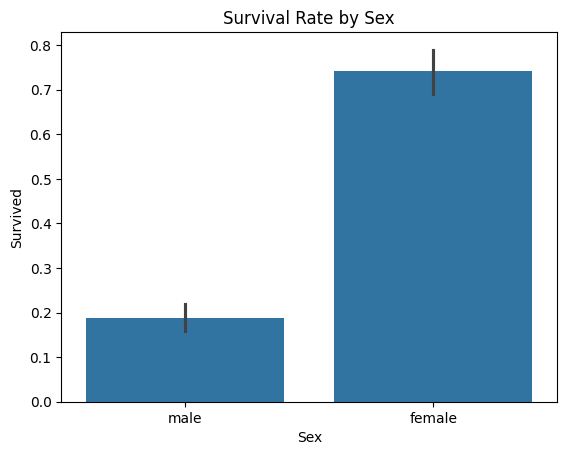

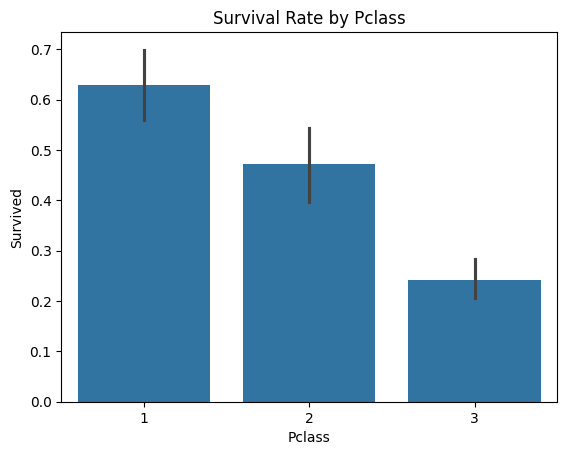

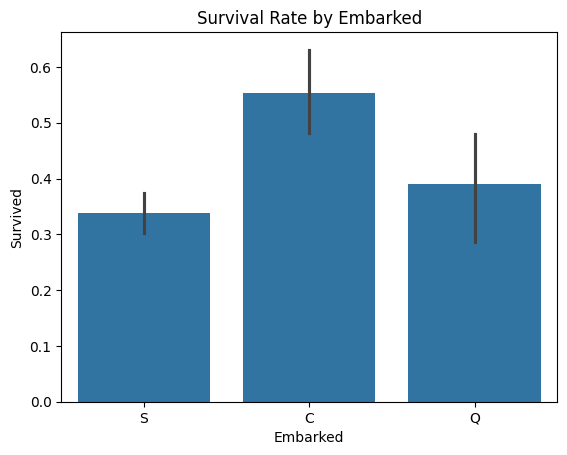

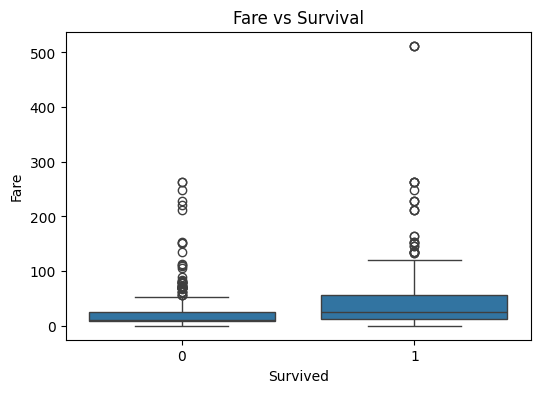

In [36]:

#  Bivariate Analysis

if {"Survived","Sex"}.issubset(df.columns):
    sns.barplot(x="Sex", y="Survived", data=df)
    plt.title("Survival Rate by Sex")
    plt.show()

if {"Survived","Pclass"}.issubset(df.columns):
    sns.barplot(x="Pclass", y="Survived", data=df)
    plt.title("Survival Rate by Pclass")
    plt.show()

if {"Survived","Embarked"}.issubset(df.columns):
    sns.barplot(x="Embarked", y="Survived", data=df)
    plt.title("Survival Rate by Embarked")
    plt.show()
    
if {"Survived","Fare"}.issubset(df.columns):
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Survived", y="Fare", data=df)
    plt.title("Fare vs Survival")
    plt.show()


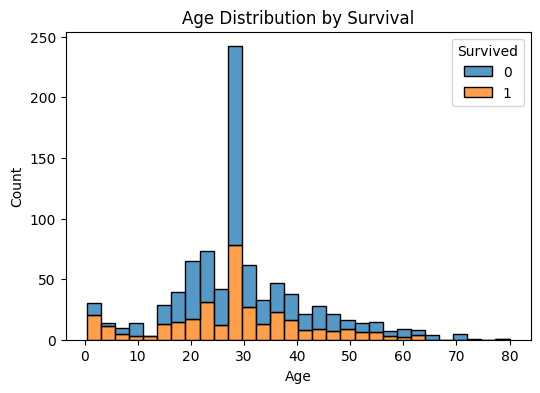

In [35]:

plt.figure(figsize=(6,4))
sns.histplot(data=df, x="Age", hue="Survived", multiple="stack", bins=30)
plt.title("Age Distribution by Survival")
plt.show()


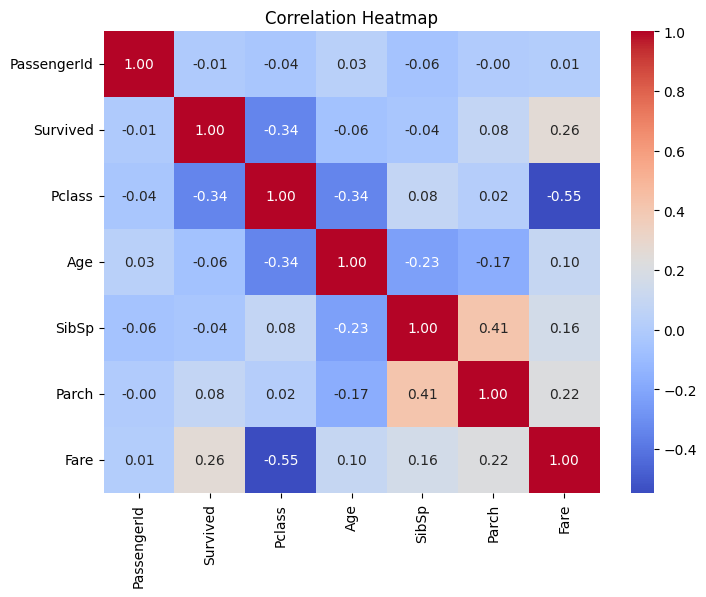

In [37]:

#  Correlation Heatmap

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

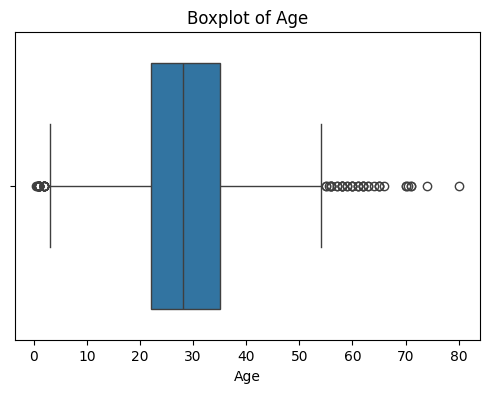

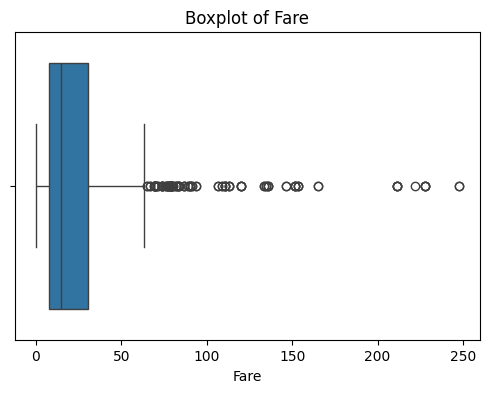

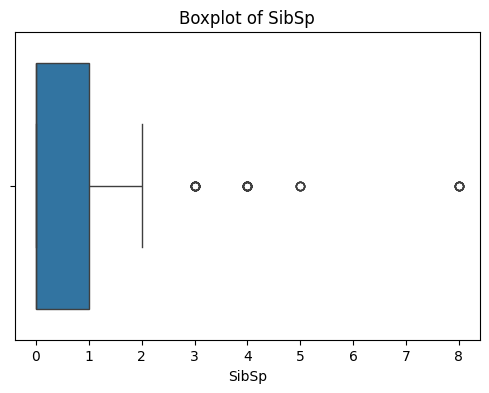

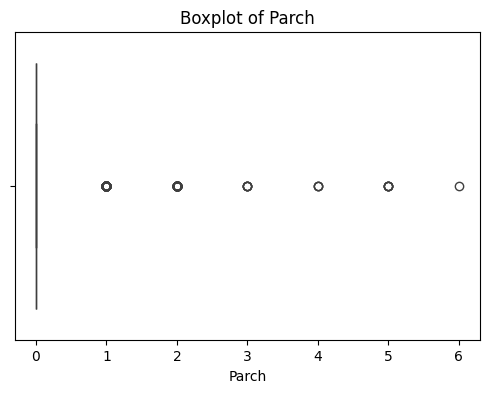

In [114]:
# ========================================
#  Outlier Detection & Handling
# ========================================
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# trim extreme Fare values
if "Fare" in df.columns:
    q_low, q_high = df["Fare"].quantile([0.01, 0.99])
    df = df[(df["Fare"] >= q_low) & (df["Fare"] <= q_high)]

In [44]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


C:\Users\Admin\AppData\Local\Temp\ipykernel_23696\961580618.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sex_counts.index,y=sex_counts.values,palette='viridis')


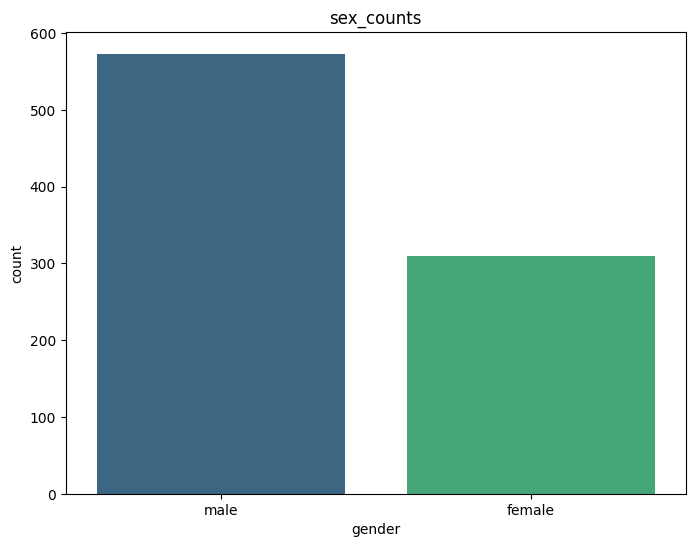

In [48]:
# visualization
sex_counts=df['Sex'].value_counts()
sex_counts

plt.figure(figsize=(8,6))
sns.barplot(x=sex_counts.index,y=sex_counts.values,palette='viridis')
plt.title('sex_counts')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_23696\1631761208.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts.index,y=age_counts.values,palette='viridis')


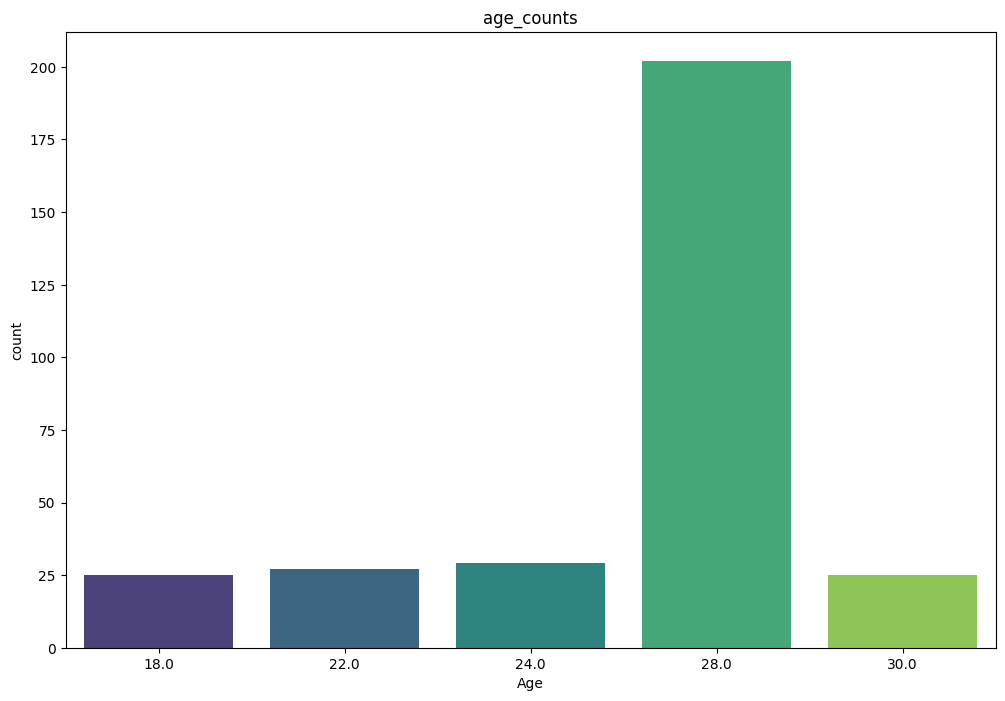

Age
28.0    202
24.0     29
22.0     27
18.0     25
30.0     25
Name: count, dtype: int64

In [49]:
#the most 5 age in data
age_counts=df['Age'].value_counts().head()

plt.figure(figsize=(12,8))
sns.barplot(x=age_counts.index,y=age_counts.values,palette='viridis')
plt.title('age_counts')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()
age_counts

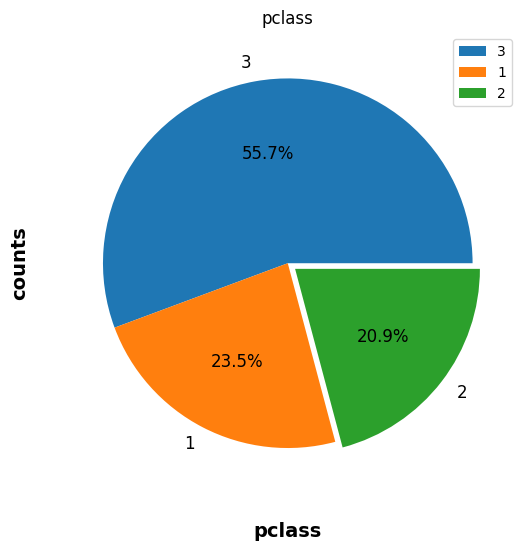

Pclass
3    491
1    207
2    184
Name: count, dtype: int64

In [57]:
pclass_counts=df['Pclass'].value_counts()


plt.figure(figsize = (20, 6))
explode = (0,0,0.05)
pclass_counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('pclass')
plt.xlabel('pclass', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = pclass_counts.index, loc = "best")
plt.show()
pclass_counts

C:\Users\Admin\AppData\Local\Temp\ipykernel_23696\3905520796.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=SibSp_counts.index,y=SibSp_counts.values,palette='viridis')


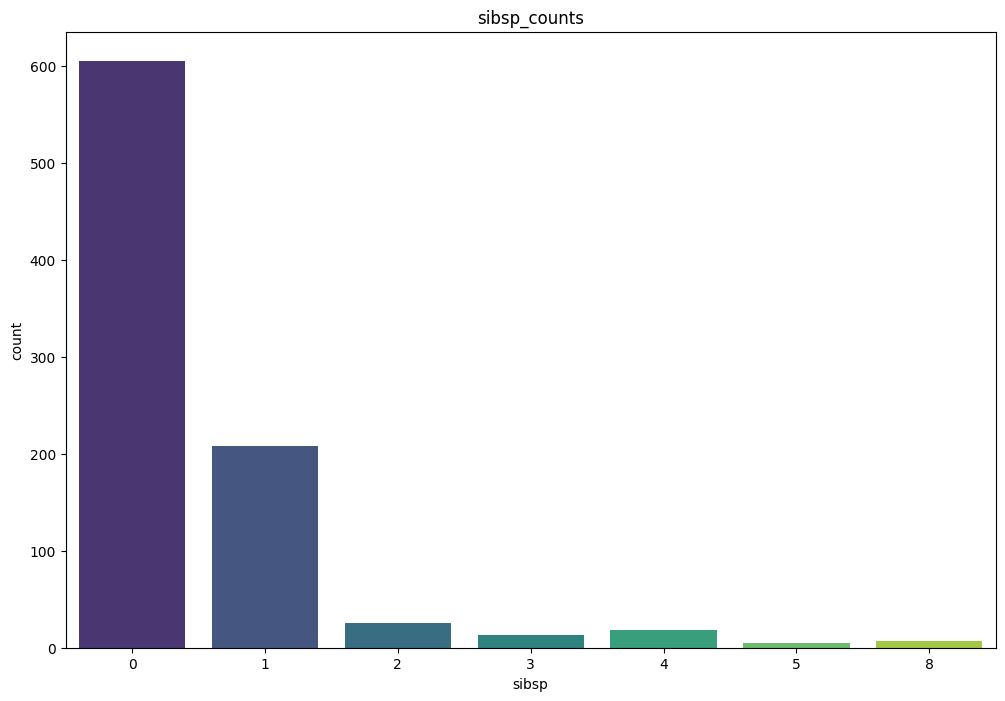

SibSp
0    605
1    208
2     26
4     18
3     13
8      7
5      5
Name: count, dtype: int64

In [58]:
SibSp_counts=df['SibSp'].value_counts()


plt.figure(figsize=(12,8))
sns.barplot(x=SibSp_counts.index,y=SibSp_counts.values,palette='viridis')
plt.title('sibsp_counts')
plt.xlabel('sibsp')
plt.ylabel('count')
plt.show()
SibSp_counts

C:\Users\Admin\AppData\Local\Temp\ipykernel_23696\4088253879.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Parch_counts.index,y=Parch_counts.values,palette='viridis')


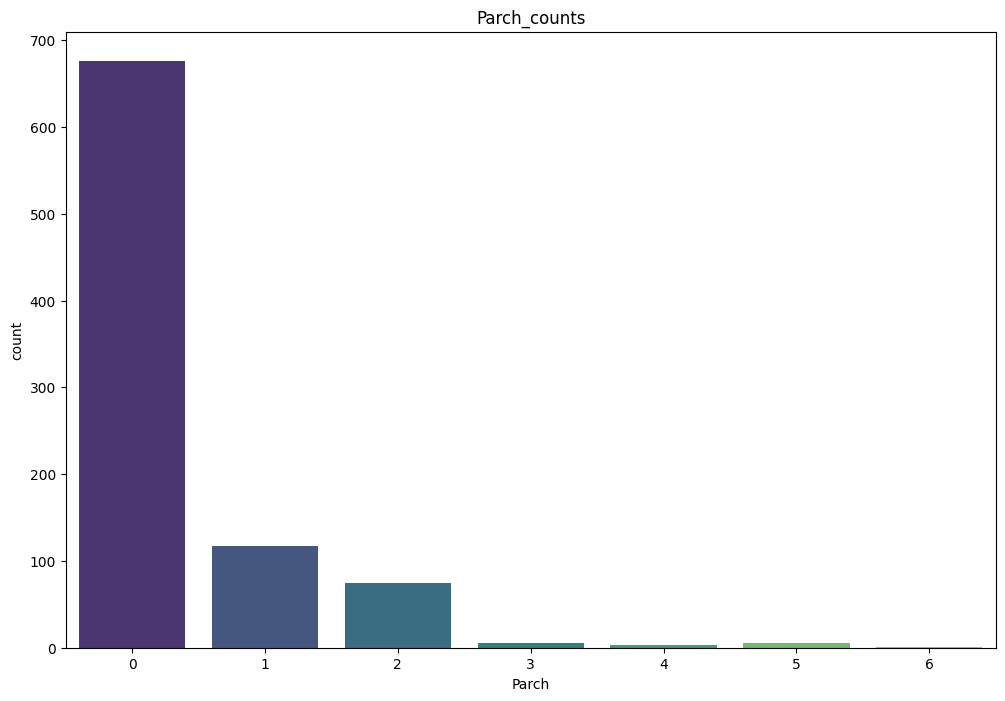

Parch
0    676
1    117
2     75
5      5
3      5
4      3
6      1
Name: count, dtype: int64

In [59]:
Parch_counts=df['Parch'].value_counts()


plt.figure(figsize=(12,8))
sns.barplot(x=Parch_counts.index,y=Parch_counts.values,palette='viridis')
plt.title('Parch_counts')
plt.xlabel('Parch')
plt.ylabel('count')
plt.show()
Parch_counts

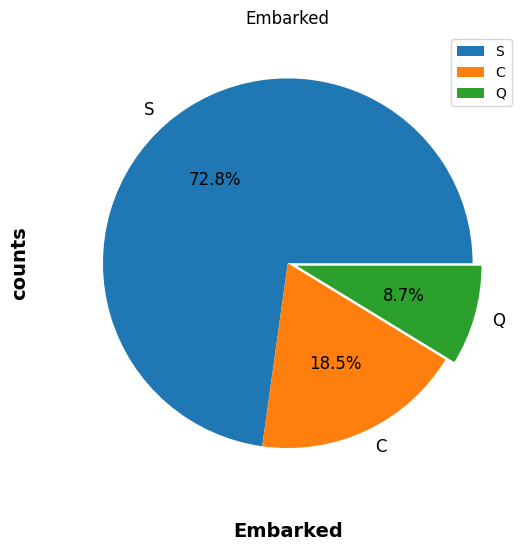

Embarked
S    642
C    163
Q     77
Name: count, dtype: int64

In [61]:
Embarked_counts=df['Embarked'].value_counts()
plt.figure(figsize = (20, 6))
explode = (0,0,0.05)
Embarked_counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('Embarked')
plt.xlabel('Embarked', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = Embarked_counts.index, loc = "best")
plt.show()
Embarked_counts

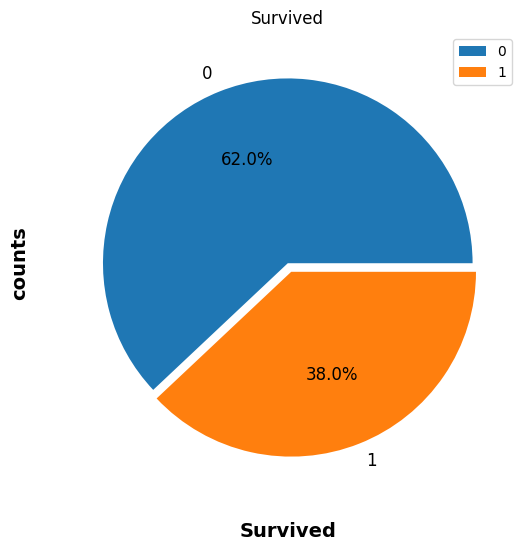

Survived
0    547
1    335
Name: count, dtype: int64

In [62]:
Survived_counts=df['Survived'].value_counts()
plt.figure(figsize = (20, 6))
explode = (0,0.05)
Survived_counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('Survived')
plt.xlabel('Survived', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = Survived_counts.index, loc = "best")
plt.show()
Survived_counts

C:\Users\Admin\AppData\Local\Temp\ipykernel_23696\3615526981.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=df, palette="Set2")


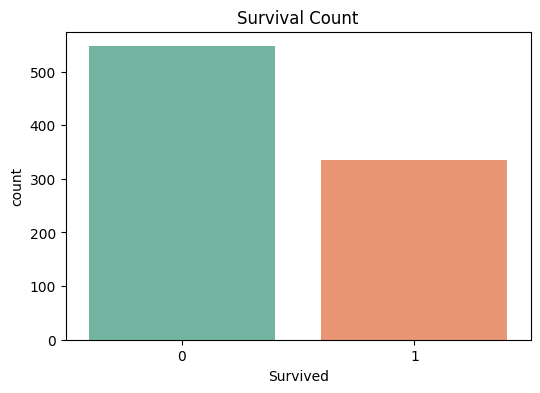

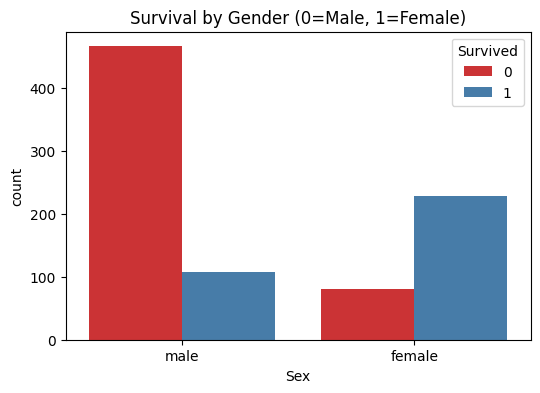

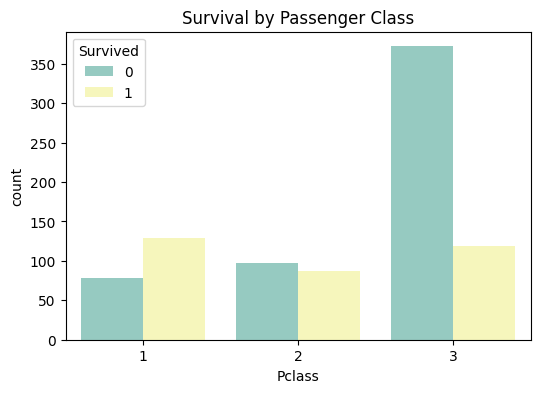

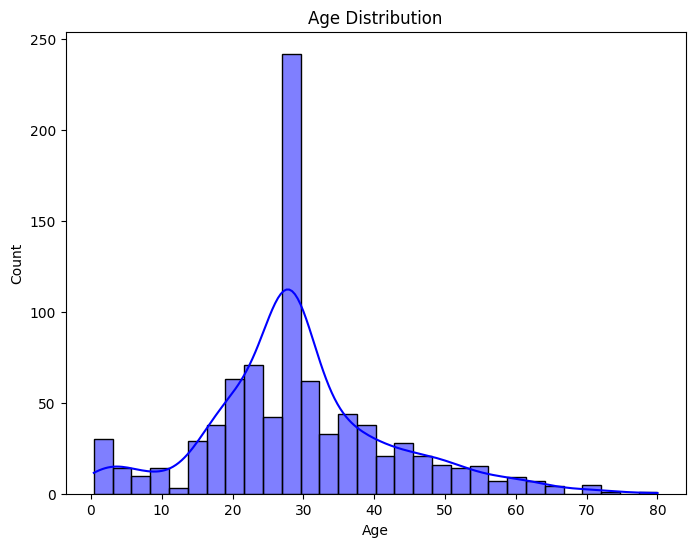

C:\Users\Admin\AppData\Local\Temp\ipykernel_23696\3615526981.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Pclass", y="Fare", data=df, ci=None, marker="o")


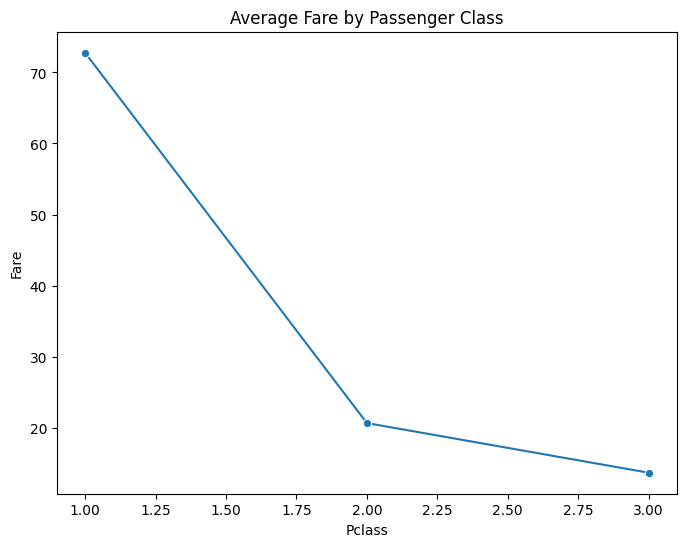

In [73]:
# Bar plot - Survival counts
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=df, palette="Set2")
plt.title("Survival Count")
plt.show()

# Bar plot - Survival by Gender
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", hue="Survived", data=df, palette="Set1")
plt.title("Survival by Gender (0=Male, 1=Female)")
plt.show()

# Bar plot - Survival by Pclass
plt.figure(figsize=(6,4))
sns.countplot(x="Pclass", hue="Survived", data=df, palette="Set3")
plt.title("Survival by Passenger Class")
plt.show()

# Histogram + KDE - Age Distribution
plt.figure(figsize=(8,6))
sns.histplot(df["Age"], bins=30, kde=True, color="blue")
plt.title("Age Distribution")
plt.show()

#  Line plot - Average Fare by Pclass
plt.figure(figsize=(8,6))
sns.lineplot(x="Pclass", y="Fare", data=df, ci=None, marker="o")
plt.title("Average Fare by Passenger Class")
plt.show()




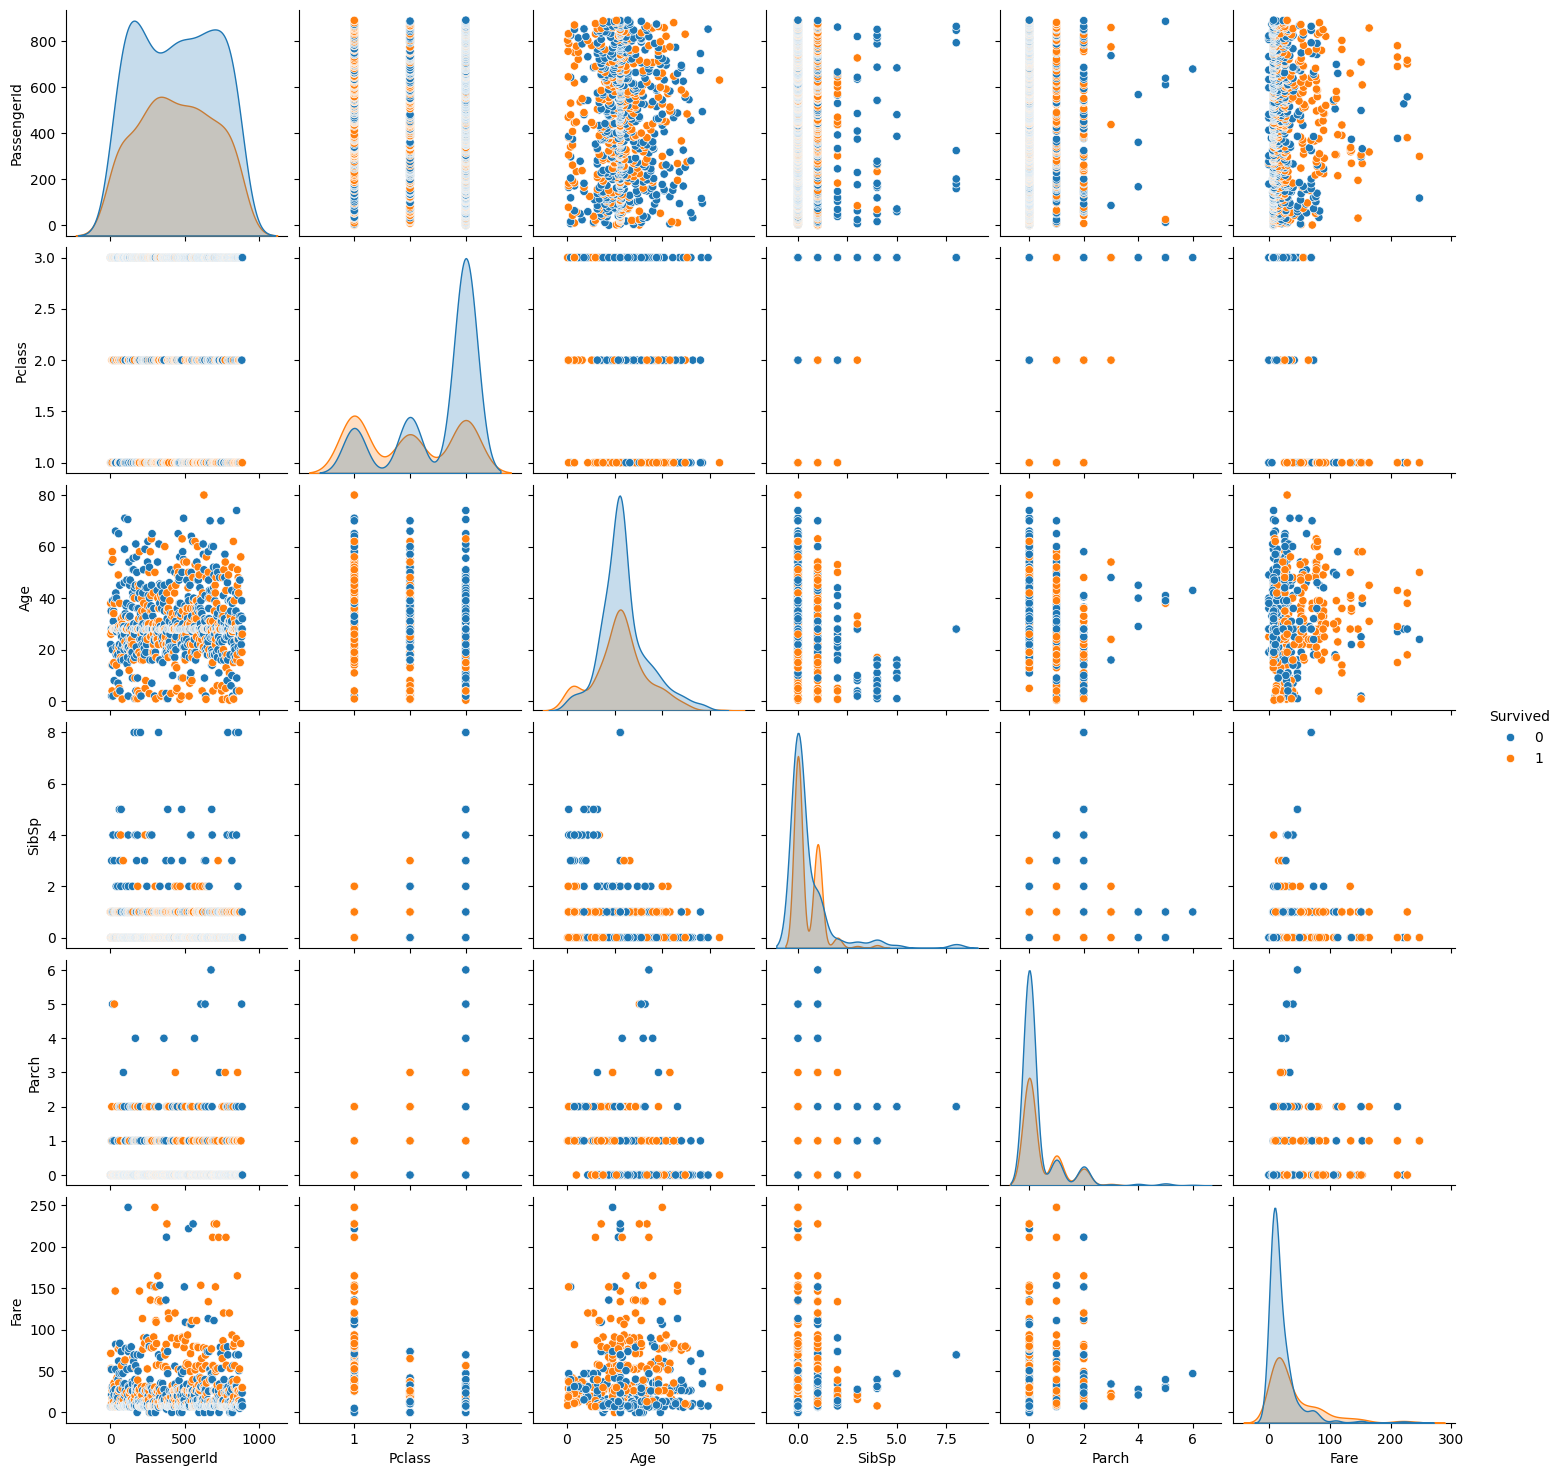

In [72]:

# Pairplot to see feature relations
sns.pairplot(df, hue="Survived", diag_kind="kde")
plt.show()

In [75]:
titanic=df.drop(columns=['PassengerId', 'Name', 'Ticket'], axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [76]:
### convert the gender to binary 0 and 1
titanic['Sex']=titanic['Sex'].replace({'male':1,'female':0})
titanic.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_23696\3490178495.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic['Sex']=titanic['Sex'].replace({'male':1,'female':0})


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [77]:
# Fill missing values in age column by imputing the median
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic.isna().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_23696\3214489661.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [78]:
# Fill missing values in embarked column by imputing the mode
titanic["Embarked"].fillna(titanic["Embarked"].mode()[0], inplace=True)
titanic.isna().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_23696\420693980.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["Embarked"].fillna(titanic["Embarked"].mode()[0], inplace=True)


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [79]:
titanic['Embarked']=titanic['Embarked'].replace({'S':1,'C':2,'Q':3})
titanic.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_23696\892169521.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic['Embarked']=titanic['Embarked'].replace({'S':1,'C':2,'Q':3})


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


In [80]:
titanic.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.332033,-0.541742,-0.062576,-0.041964,0.078480,0.271495,0.101324
Pclass,-0.332033,1.000000,0.127518,-0.344676,0.100419,0.045572,-0.620432,0.051415
Sex,-0.541742,0.127518,1.000000,0.076742,-0.107708,-0.246921,-0.223800,-0.115572
Age,-0.062576,-0.344676,0.076742,1.000000,-0.231151,-0.184005,0.116119,-0.008473
SibSp,-0.041964,0.100419,-0.107708,-0.231151,1.000000,0.405132,0.170053,-0.057672
Parch,0.078480,0.045572,-0.246921,-0.184005,0.405132,1.000000,0.197772,-0.078458
Fare,0.271495,-0.620432,-0.223800,0.116119,0.170053,0.197772,1.000000,0.041991
Embarked,0.101324,0.051415,-0.115572,-0.008473,-0.057672,-0.078458,0.041991,1.000000


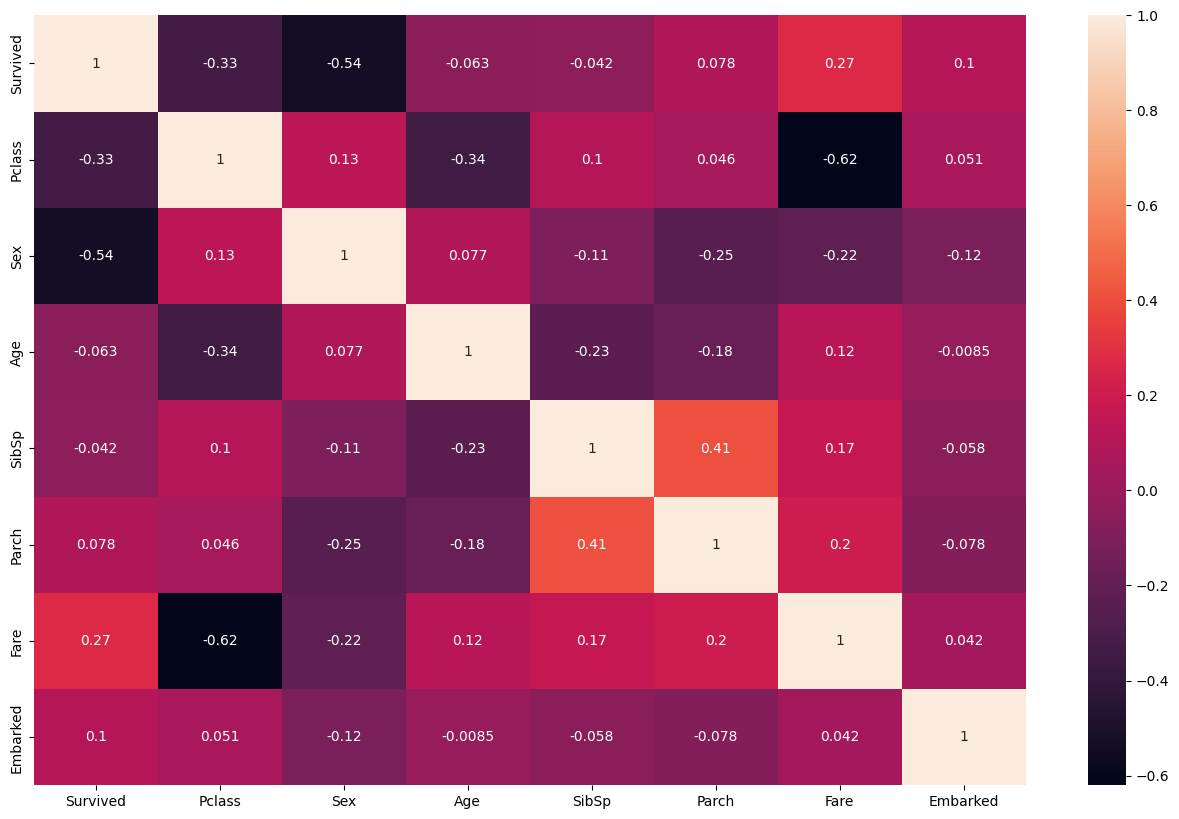

In [81]:
plt.figure(figsize=(16, 10))
sns.heatmap(titanic.corr(), annot=True)
plt.show()

In [86]:
# define features and target
x=titanic.drop(columns=['Survived'])
y=titanic['Survived']

# Data scaling
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

# reshape to y
y=y.values.reshape(-1,1)

# split data 
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)

In [93]:
# Logestic Regression
lg=LogisticRegression(penalty="l2",max_iter=1000,solver="lbfgs")
lg.fit(X_train,y_train)


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [97]:
lg.score(X_train,y_train)


0.7872340425531915

In [96]:
y_pred=lg.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.847457627118644


[[100  15]
 [ 12  50]]


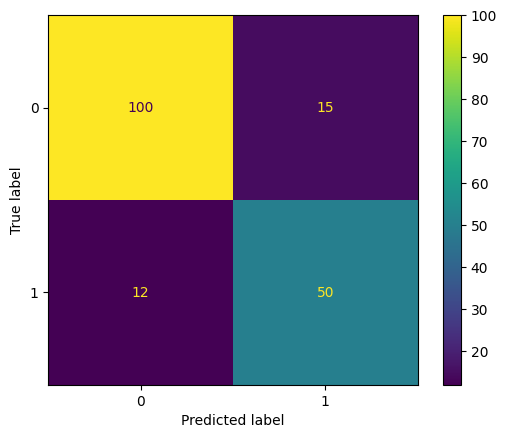

In [98]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       115
           1       0.77      0.81      0.79        62

    accuracy                           0.85       177
   macro avg       0.83      0.84      0.83       177
weighted avg       0.85      0.85      0.85       177



In [100]:
# DecisionTree
Dt=DecisionTreeClassifier()
Dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [101]:
Dt.score(X_train,y_train)

0.9829787234042553

In [102]:
y_pred=Dt.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8305084745762712


[[98 17]
 [13 49]]


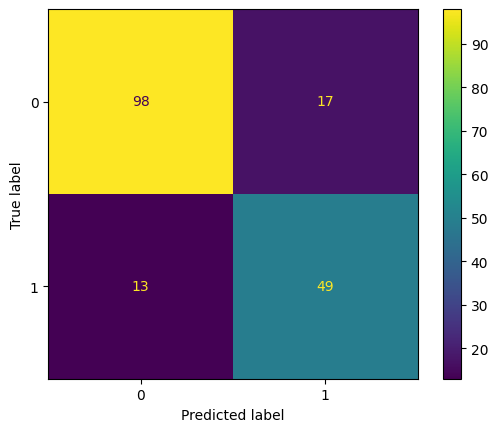

In [103]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       115
           1       0.74      0.79      0.77        62

    accuracy                           0.83       177
   macro avg       0.81      0.82      0.82       177
weighted avg       0.83      0.83      0.83       177



In [105]:
# RandomForestClassifier
Rf=RandomForestClassifier(n_estimators=1000)
Rf.fit(X_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=1000)

In [106]:
Rf.score(X_train,y_train)

0.9829787234042553

In [107]:
y_pred=Rf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8192090395480226


[[95 20]
 [12 50]]


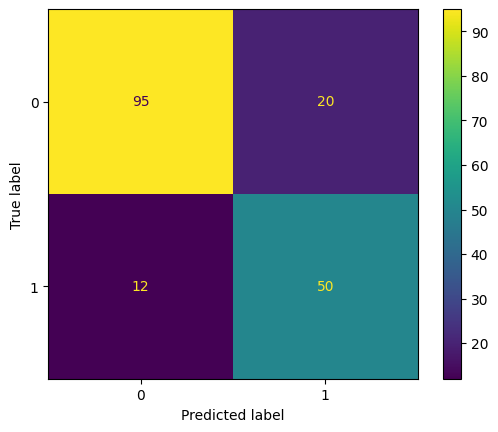

In [108]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       115
           1       0.71      0.81      0.76        62

    accuracy                           0.82       177
   macro avg       0.80      0.82      0.81       177
weighted avg       0.83      0.82      0.82       177



In [110]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(5)
knn.fit(X_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [111]:
knn.score(X_train,y_train)

0.8524822695035461

In [112]:
pred=knn.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8192090395480226


[[95 20]
 [12 50]]


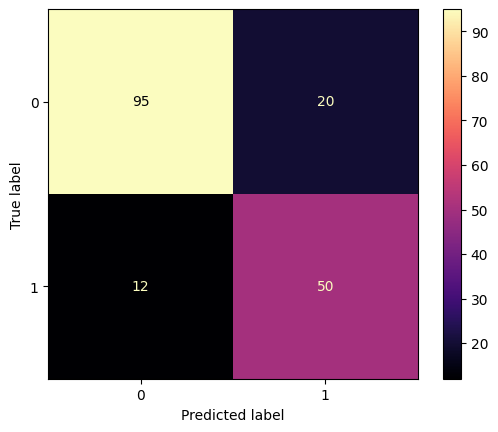

In [113]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap="magma")
print(confusion_matrix(y_test, y_pred))